## Step 1: Importing Essential Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import roc_curve,auc,classification_report
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout  
from keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
import random
import os
#print(os.listdir("../input"))


Using TensorFlow backend.
C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ASUS\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

## Step 2: Loading Data
In this step we will first create separate directory to store Parasitized and Normal images (Uninfected)

In [3]:
# setting path of directory
PARA_DIR = "cell_images/Parasitized/"
NORM_DIR =  "cell_images/Uninfected/"

# storing all the files from directories PARA_DIR and NORM_DIR to Pimages and Nimages for accessing images directly
Pimages = os.listdir(PARA_DIR)
Nimages = os.listdir(NORM_DIR)

## Checking sample images
In this step we will check the actual sample images of both infected and normal blood sample

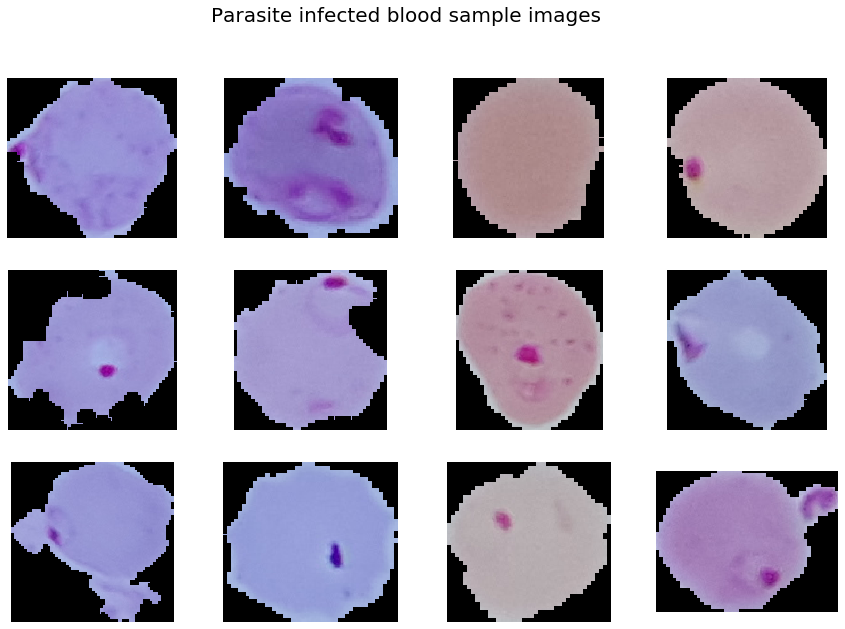

In [28]:
sample_parasite = random.sample(Pimages,12)
f,ax = plt.subplots(3,4,figsize=(15,10))

for i in range(0,12):
    im = cv2.imread('cell_images/Parasitized/'+sample_parasite[i])
    ax[i//4,i%4].imshow(im)
    ax[i//4,i%4].axis('off')
f.suptitle('Parasite infected blood sample images',fontsize=20)
plt.show()

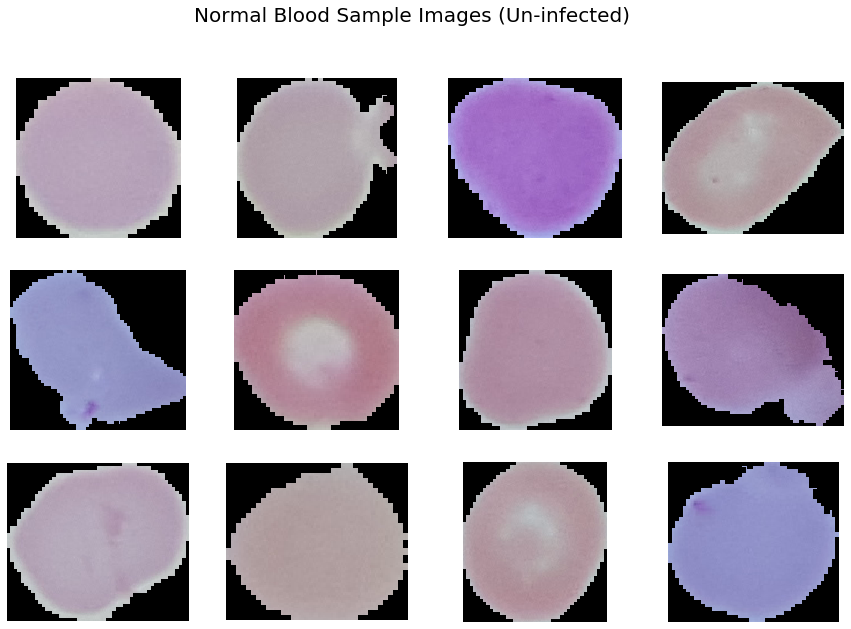

In [27]:
sample_normal = random.sample(Nimages,12)
f,ax = plt.subplots(3,4,figsize=(15,10))

for i in range(0,12):
    im = cv2.imread('cell_images/Uninfected/'+sample_normal[i])
    ax[i//4,i%4].imshow(im)
    ax[i//4,i%4].axis('off')
f.suptitle('Normal Blood Sample Images (Un-infected)', fontsize=20)
plt.show()

## Step 4: Data Preprocessing (Labeling & Resizing of images)

In [34]:
data=[]
labels=[]
Parasitized=os.listdir( "cell_images/Parasitized/")
for a in Parasitized:
    try:
        image=cv2.imread( "cell_images/Parasitized/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Uninfected=os.listdir("cell_images/Uninfected/")
for b in Uninfected:
    try:
        image=cv2.imread("cell_images/Uninfected/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")

In [35]:
# segregating data and labels
Cells=np.array(data)
labels=np.array(labels)

np.save("Cells",Cells)
np.save("labels",labels)

In [37]:
# Loading data of cell image and label of image

cell = np.load("Cells.npy")
labels= np.load("labels.npy")

In [40]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

num_classes=len(np.unique(labels))
len_data=len(Cells)

## Step 5 : Train-Test Split

In [43]:
# splitting cells images into 90:10 ratio i.e., 90% for training and 10% for testing purpose
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]

(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [45]:
y_train

array([1, 0, 0, ..., 0, 1, 1])

In [46]:
x_train

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

## Step 6: Normalizing Data

In [47]:
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)


## Step 7: Label Encoding

Here the problem has two classes so last output layer of neural network will have 2 neurons one for each class, One hot encoding will help us to change labels in binary format.
example:
    2 can be represented as [1 0] if output layer has 2 neurons and [0 0 1 0] if output has 4 neurons/classes

In [48]:
#Doing One hot encoding as classifier has multiple classes
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [49]:
y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

## Step 8: Model Building: CNN

In [50]:
# Set random seed
np.random.seed(0)

#creating sequential model
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 32)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
________________________________________________

## Step 9: Compiling the model

In [51]:
# compile the model with loss as categorical_crossentropy and using adam optimizer you can test result by trying RMSProp as well as Momentum
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Step 10: Setting Callbacks

In [54]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss', save_best_only=True)]

## Step 11: Model Fitting

In [55]:
#Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ] 
h=model.fit(x_train,y_train,batch_size=32,callbacks=callbacks, validation_data=(x_test,y_test),epochs=20,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 24803 samples, validate on 2755 samples
Epoch 1/20
24803/24803 [==============================] - 204s 8ms/step - loss: 0.3872 - accuracy: 0.8113 - val_loss: 0.1683 - val_accuracy: 0.9539
Epoch 2/20
24803/24803 [==============================] - 200s 8ms/step - loss: 0.1760 - accuracy: 0.9452 - val_loss: 0.1520 - val_accuracy: 0.9590
Epoch 3/20
24803/24803 [==============================] - 178s 7ms/step - loss: 0.1638 - accuracy: 0.9495 - val_loss: 0.1482 - val_accuracy: 0.9597
Epoch 4/20
24803/24803 [==============================] - 192s 8ms/step - loss: 0.1524 - accuracy: 0.9533 - val_loss: 0.1399 - val_accuracy: 0.9579
Epoch 5/20
24803/24803 [==============================] - 174s 7ms/step - loss: 0.1447 - accuracy: 0.9552 - val_loss: 0.1374 - val_accuracy: 0.9572
Epoch 6/20
24803/24803 [==============================] - 181s 7ms/step - loss: 0.1426 - accuracy: 0.9534 - val_loss: 0.1337 - val_accuracy: 0.9597
Epoch 7/20
2480

## Step 12: Model Evaluation

In [57]:
# saving the weight of model
from numpy import loadtxt
from keras.models import load_model
model = load_model('.mdl_wts.hdf5')

#checking the score of the model
score=model.evaluate(x_test,y_test)
print(score)

2755/2755 [==============================] - 6s 2ms/step
[0.13365072390020652, 0.959709644317627]


In [58]:
# checking the accuracy of thr 
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

2755/2755 [==============================] - 6s 2ms/step

 Test_Accuracy:- 0.959709644317627


### Confusion Matrix

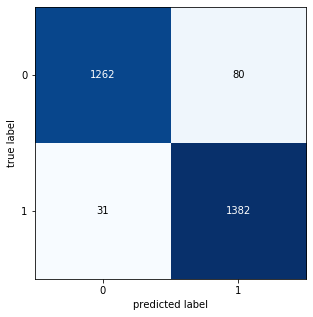

In [60]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

#creating confusion matrix
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
# plotting confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

### Plotting History of Model's Accuracy 

In [61]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

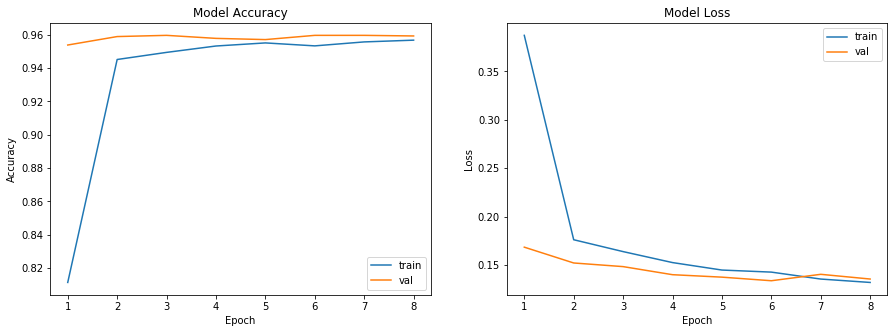

In [62]:
plot_model_history(h)

### Printing Classification report

In [63]:
print('{}'.format( 
                           classification_report(y_true , pred)))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1342
           1       0.95      0.98      0.96      1413

    accuracy                           0.96      2755
   macro avg       0.96      0.96      0.96      2755
weighted avg       0.96      0.96      0.96      2755



## Step 13: Plotting ROC AUC Curve
In this step we will first compute Are Under Curve (AUC) based on which we plot ROC curve

### Computing Area Under Curve (AUC)

In [64]:
fpr_keras, tpr_keras, thresholds = roc_curve(y_true.ravel(), pred.ravel())
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.9592241723911349

In [65]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

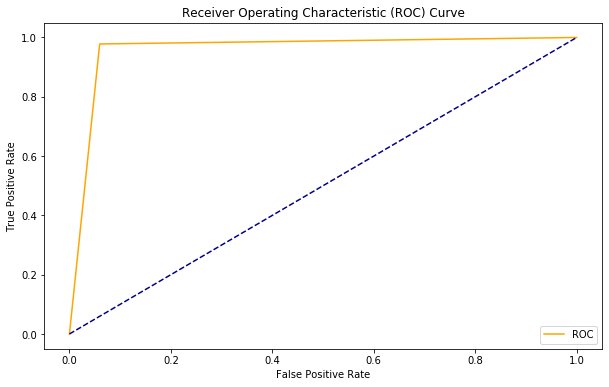

In [66]:
plot_roc_curve(fpr_keras, tpr_keras)

**The performance of the model on the test data seems to fairly good with 95.77% accuracy.**

### WITH DATA AUGMENTATION

In [68]:
from keras.preprocessing.image import ImageDataGenerator

In [69]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = False)

In [74]:
# Set random seed
np.random.seed(0)

#creating sequential model
model_aug=Sequential()
model_aug.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model_aug.add(MaxPooling2D(pool_size=2))
model_aug.add(Dropout(0.2))
model_aug.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model_aug.add(MaxPooling2D(pool_size=2))
model_aug.add(Dropout(0.2))
model_aug.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model_aug.add(MaxPooling2D(pool_size=2))
model_aug.add(Dropout(0.2))


model_aug.add(Flatten())

model_aug.add(Dense(512,activation="relu"))
model_aug.add(Dropout(0.4))
model_aug.add(Dense(2,activation="softmax"))#2 represent output layer neurons 
model_aug.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 50, 50, 32)        416       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 32)        4128      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 32)       

In [76]:
#compile the model
from keras import optimizers

optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
model_aug.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])

In [79]:
#fit the model on the augmented dataset
h_aug = model_aug.fit_generator(train_generator, steps_per_epoch = len(x_train) // 64, epochs = 20)

Epoch 1/20
387/387 [==============================] - 171s 441ms/step - loss: 0.6932 - accuracy: 0.4977
Epoch 2/20
387/387 [==============================] - 155s 401ms/step - loss: 0.6932 - accuracy: 0.4989
Epoch 3/20
387/387 [==============================] - 152s 392ms/step - loss: 0.6932 - accuracy: 0.4985
Epoch 4/20
387/387 [==============================] - 152s 392ms/step - loss: 0.6932 - accuracy: 0.5028
Epoch 5/20
387/387 [==============================] - 157s 406ms/step - loss: 0.6932 - accuracy: 0.5005
Epoch 6/20
387/387 [==============================] - 147s 379ms/step - loss: 0.6932 - accuracy: 0.4968
Epoch 7/20
387/387 [==============================] - 145s 375ms/step - loss: 0.6932 - accuracy: 0.5017
Epoch 8/20
387/387 [==============================] - 147s 381ms/step - loss: 0.6932 - accuracy: 0.4995
Epoch 9/20
387/387 [==============================] - 146s 377ms/step - loss: 0.6932 - accuracy: 0.4967
Epoch 10/20
387/387 [==============================] - 147s 379m

In [80]:
#evaluate the model on augmented test data
predict = model_aug.evaluate_generator(val_generator, steps = 5)